**ClusterAI 2023**

**Ciencia de Datos - Ingenieria Industrial UTN BA**

En este código nos centraremos en la predicción del precio mediante modelos de Machine Learning del dataset de Airbnb.

**Autores:**


*   Fabiana Giorlando
*   Zoe Ibire


In [19]:
# Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [20]:
# Importamos librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
# Cargamos el dataset.

airbnb = pd.read_csv('/content/drive/My Drive/airbnb_us.csv')


# Compruebamos observando una parte de los datos con ".tail".
# La función ".tail" devuelve las últimas (6) filas.

airbnb.tail(6)

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
19303,16208920,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,False,DC,...,-77.044241,1BD in heart of Adams Morgan,Kalorama,3,87.0,NaN,20009,1.0,1.0,105.0
19304,18997559,House,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,2.5,Real Bed,flexible,False,DC,...,-76.980518,Charming H St/Rosedale Rowhouse,NaN,3,90.0,https://a0.muscache.com/im/pictures/8ba850b8-7...,20002,2.0,2.0,135.0
19305,18395940,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,2.0,Real Bed,strict,True,Chicago,...,-87.641210,"Amazing 2-BR Apt in Old Town! Eat,Drink,Beach&...",Old Town,15,96.0,https://a0.muscache.com/im/pictures/688bc96a-3...,60610,2.0,3.0,110.0
19306,14838304,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,strict,True,DC,...,-77.028127,Full Rowhouse w/Patio & Balcony,Columbia Heights,19,91.0,https://a0.muscache.com/im/pictures/57358607/3...,20009,1.0,1.0,141.0
19307,11829011,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,moderate,True,SF,...,-122.407384,WorldMark W'ndm Union Square Studio,Union Square,24,98.0,https://a0.muscache.com/im/pictures/9a99e2de-c...,94108,1.0,1.0,170.0
19308,14934112,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,Chicago,...,-87.623046,Gold Coast Specialty,NaN,6,100.0,https://a0.muscache.com/im/pictures/32922903/b...,60610,1.0,1.0,78.0


## Limpieza y Reconstrucción de Datos

In [22]:
# Observamos el tamaño del dataset con la función ".shape".

airbnb.shape

(19309, 29)

In [23]:
# Como extra, vemos la cantidad de valores no nulos para cada categoria y su tipo de dato
# con la función ".info"

airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19309 entries, 0 to 19308
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      19309 non-null  int64  
 1   property_type           19309 non-null  object 
 2   room_type               19309 non-null  object 
 3   amenities               19309 non-null  object 
 4   accommodates            19309 non-null  int64  
 5   bathrooms               19274 non-null  float64
 6   bed_type                19309 non-null  object 
 7   cancellation_policy     19309 non-null  object 
 8   cleaning_fee            19309 non-null  bool   
 9   city                    19309 non-null  object 
 10  description             19309 non-null  object 
 11  first_review            15355 non-null  object 
 12  host_has_profile_pic    19306 non-null  object 
 13  host_identity_verified  19306 non-null  object 
 14  host_response_rate      15013 non-null

In [24]:
 # Analizamos los posibles valores que toma para ver si vale la pena.
airbnb.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [25]:
#Eliminamos columnas que no nos interesan.
airbnb = airbnb.drop(['id',"amenities", "bed_type","property_type","thumbnail_url", "host_has_profile_pic", "beds","latitude","longitude","name","host_identity_verified","host_response_rate","host_since", "first_review","last_review","review_scores_rating","description"],axis=1)

# Compruebamos observando una parte de los datos con ".tail".

airbnb.tail(6)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,instant_bookable,neighbourhood,number_of_reviews,zipcode,bedrooms,price
19303,Entire home/apt,2,1.0,flexible,False,DC,f,Kalorama,3,20009,1.0,105.0
19304,Entire home/apt,5,2.5,flexible,False,DC,f,NaN,3,20002,2.0,135.0
19305,Entire home/apt,4,2.0,strict,True,Chicago,t,Old Town,15,60610,2.0,110.0
19306,Entire home/apt,4,1.0,strict,True,DC,f,Columbia Heights,19,20009,1.0,141.0
19307,Entire home/apt,2,1.0,moderate,True,SF,f,Union Square,24,94108,1.0,170.0
19308,Entire home/apt,2,1.0,strict,True,Chicago,f,NaN,6,60610,1.0,78.0


In [26]:
# Observamos el tamaño del dataset con la función ".shape".

airbnb.shape

(19309, 12)

In [27]:
# Corroboramos si hay valores nulos(NaNs).

col_nulls = airbnb.isnull().any()
col_nulls

room_type              False
accommodates           False
bathrooms               True
cancellation_policy    False
cleaning_fee           False
city                   False
instant_bookable       False
neighbourhood           True
number_of_reviews      False
zipcode                 True
bedrooms                True
price                  False
dtype: bool

In [28]:
# Para poder determinar los nombres de cada columna, el tipo de dato y la cantidad de no nulos en una linea de codigo
# utilizando la funcion ".agg" para agrupar operaciones sobre un mismo eje, la funcion "col" crea el cuadro
# para contar la cantidad de nulos utilizo la función "lambda", en donde "x" representa la columna actual
# y "x.isnull().sum()"" cuenta cuántos valores nulos hay en esa columna.
# ".T" es una transposición del resultado para que se observe mejor.

airbnb.agg({col: ['name', 'dtype', lambda x: x.isnull().sum()] for col in airbnb.columns}).T

,name,dtype,<lambda>
room_type,room_type,object,0
accommodates,accommodates,int64,0
bathrooms,bathrooms,float64,35
cancellation_policy,cancellation_policy,object,0
cleaning_fee,cleaning_fee,bool,0
city,city,object,0
instant_bookable,instant_bookable,object,0
neighbourhood,neighbourhood,object,1458
number_of_reviews,number_of_reviews,int64,0
zipcode,zipcode,object,225


In [29]:
# Rellenamos los nulos de neighbourhood usando los datos de zipcode para averiguarlos.
airbnb['neighbourhood'] = (airbnb.groupby('zipcode')['neighbourhood'].transform('first'))

In [30]:
# Dropeamos todos los rows que tengan valores nulos ya que son pocos en relación a la cantidad.
airbnb.dropna(axis=0,how = 'any',inplace = True)
#  Dropeamos la columna zipcode ya que no resulta de utilidad.
airbnb = airbnb.drop('zipcode', axis=1)

In [31]:
# Filtramos el DataFrame para eliminar valores por debajo de Q5 y por encima de Q95
Q95 = airbnb['price'].quantile(0.95)
Q5= airbnb['price'].quantile(0.05)
airbnb = airbnb[(airbnb['price'] >= Q5) & (airbnb['price'] <= Q95)]


In [32]:
# Calculamos del percentil 5 (Q5) y el Percentil 95 (Q95) de la variable "bathrooms".
Q5 = airbnb['bathrooms'].quantile(0.05)
Q95 = airbnb['bathrooms'].quantile(0.95)

# Filtramos el DataFrame para eliminar valores por debajo de Q5 y por encima de Q95.
airbnb = airbnb[(airbnb['bathrooms'] >= Q5) & (airbnb['bathrooms'] <= Q95)]


In [33]:
# Calculamos del percentil 5 (Q5) y el Percentil 95 (Q95) de la variable "bedrooms"
Q5 = airbnb['bedrooms'].quantile(0.05)
Q95 = airbnb['bedrooms'].quantile(0.95)

# Filtramos el DataFrame para eliminar valores por debajo de Q5 y por encima de Q95
airbnb = airbnb[(airbnb['bedrooms'] >= Q5) & (airbnb['bedrooms'] <= Q95)]

In [34]:
# Calculamos del percentil 5 (Q5) y el Percentil 95 (Q95) de la variable "accommodates".
Q5 = airbnb['accommodates'].quantile(0.05)
Q95 = airbnb['accommodates'].quantile(0.95)

# Filtramos el DataFrame para eliminar valores por debajo de Q5 y por encima de Q95
airbnb = airbnb[(airbnb['accommodates'] >= Q5) & (airbnb['accommodates'] <= Q95)]

In [35]:
# dropeamos
airbnb = airbnb.drop(['cleaning_fee','instant_bookable'], axis=1)

# Machine Learning

In [36]:
# Generamos las dummies para la variable city, dentro de la variable city_dummies.
city_dummies = pd.get_dummies(airbnb.city)
city_dummies.shape

(15473, 4)

In [37]:
# Generamos las dummies para la variable room_type, dentro de la variable room_dummies.
room_dummies = pd.get_dummies(airbnb.room_type)

In [38]:
airbnb_encoded = airbnb
airbnb_encoded = airbnb_encoded.join(city_dummies)
airbnb_encoded = airbnb_encoded.join(room_dummies)
airbnb_encoded.head()

,room_type,accommodates,bathrooms,cancellation_policy,city,neighbourhood,number_of_reviews,bedrooms,price,Boston,Chicago,DC,SF,Entire home/apt,Private room,Shared room
1,Entire home/apt,2,1.0,moderate,DC,Columbia Heights,4,0.0,115.0,0,0,1,0,1,0,0
2,Private room,2,1.0,strict,SF,Noe Valley,3,1.0,85.0,0,0,0,1,0,1,0
3,Private room,2,1.0,moderate,SF,Richmond District,159,1.0,120.0,0,0,0,1,0,1,0
4,Entire home/apt,6,1.5,strict,DC,Columbia Heights,13,2.0,200.0,0,0,1,0,1,0,0
5,Private room,2,1.5,moderate,Chicago,Humboldt Park,0,1.0,60.0,0,1,0,0,0,1,0


In [39]:
# Dividimos  el conjunto de datos
y = np.array(airbnb_encoded[["price"]])
x = airbnb_encoded.drop(['price', 'neighbourhood','room_type', 'cancellation_policy','city','number_of_reviews'], axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=42)
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain_scal =scaler.transform(xtrain)
xtest_scal =scaler.transform(xtest)

### Regresión Lineal

In [40]:
# Aplicamos una regression lineal.
model = LinearRegression()
model.fit(xtrain_scal, ytrain) #fitteamos
y_pred1 = model.predict(xtest_scal) #calculamos una y predicha
sqrmean1 = np.sqrt(mean_squared_error(ytest, y_pred1)) #calculamos el error cuadratico medio
print(f"El error cuadrático medio para las predicciones de la regresión lineal es: {sqrmean1:.2f}")

El error cuadrático medio para las predicciones de la regresión lineal es: 77.77


### Support Vector Regression (SVM)

In [41]:
# Definimos el modelo SVR.
svreg = SVR()

# Definimos los parámetros a buscar en la cuadrícula.
parameters = {'kernel':('linear', 'rbf'), 'C':[1,10,100 ], 'gamma':[0.01,0.1,1]} #establecemos hiperparametros a probar

# Creamos el GridSearchCV.
regressor_svr = GridSearchCV(svreg, param_grid = parameters, cv=5,refit=True,verbose =True)
# Ajustar el modelo a los datos escalados
regressor_svr.fit(xtrain_scal, ytrain.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1],
                         'kernel': ('linear', 'rbf')},
             verbose=True)

In [42]:
regressor_svr.best_params_ #mostramos los mejores hiperparametros


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [43]:
y_pred2 = regressor_svr.predict(xtest_scal) #calculamos una y predicha
sqrmean2 = np.sqrt(mean_squared_error(ytest, y_pred2)) #calculamos el error cuadratico medio
print(f"El error cuadrático medio para las predicciones de SVR es: {sqrmean2:.2f}")

El error cuadrático medio para las predicciones de SVR es: 78.43


### Principal Component Analysis (PCA)

In [44]:
# cantidad de componentes a extraer
n_comps = 8
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(xtrain_scal))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

<Axes: >

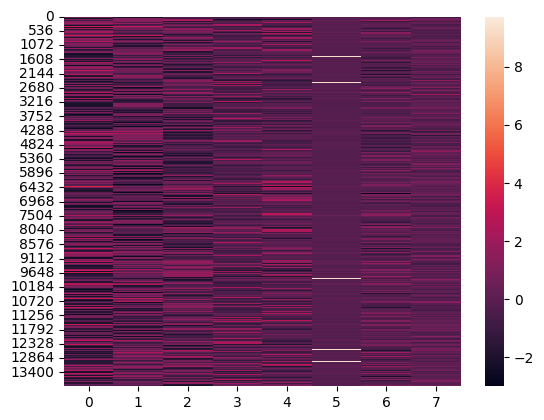

In [45]:
# Visualizamos el mapa de calor
sns.heatmap(xpca)

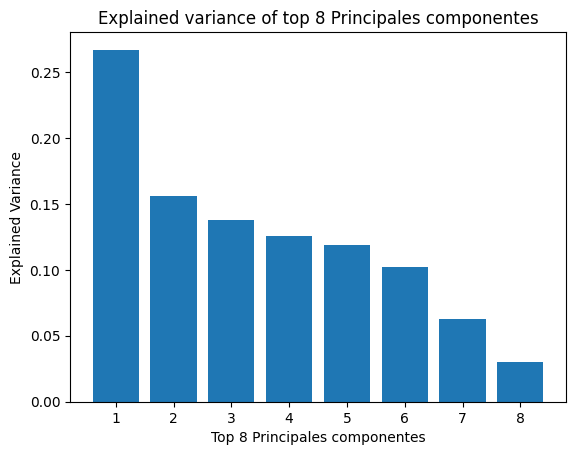

In [46]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top ' + str(n_comps) + ' Principales componentes')
plt.xlabel('Top ' +str(n_comps) + ' Principales componentes')
plt.ylabel('Explained Variance')
plt.show()

In [47]:
# Realizamos el PCA
pca = PCA(n_components=n_comps)
xpca_train = pca.fit_transform(xtrain_scal)
xpca_test = pca.transform(xtest_scal)

In [48]:
lr_pca = LinearRegression()

In [49]:
lr_pca.fit(xpca_train, ytrain.ravel())

LinearRegression()

In [50]:
ypred_pca = lr_pca.predict(xpca_test)

In [51]:
# Calculamos el MSE
mse_lr_pca = np.sqrt(mean_squared_error(ytest, ypred_pca))
print(f"MSE PCA: {mse_lr_pca}")

MSE PCA: 77.76610011937413


In [52]:
# cantidad de componentes a extraer
n_comps = 10
# definimos PCA
kpca = KernelPCA(n_components= n_comps, kernel = 'rbf', gamma = 0.02)
# fit_transform del PCA a nuestros datos
xkpca = pd.DataFrame(kpca.fit_transform(xtrain_scal))

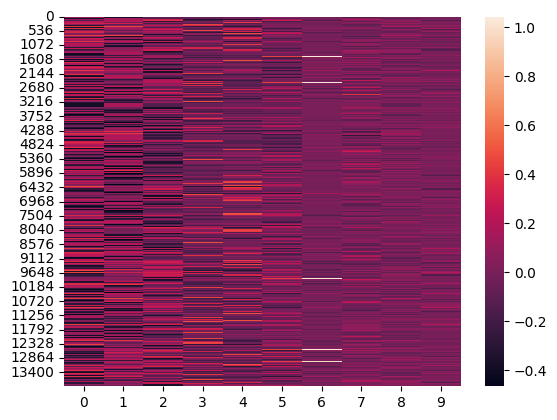

In [53]:
sns.heatmap(xkpca)
plt.show()

In [54]:

# PCA
pca = PCA(n_components=n_comps)
xpca_train = pca.fit_transform(xtrain_scal)
xpca_test = pca.transform(xtest_scal)

# Kernel PCA
kpca = KernelPCA(n_components=n_comps, kernel='rbf', gamma=0.02)
xkpca_train = kpca.fit_transform(xtrain_scal)
xkpca_test = kpca.transform(xtest_scal)

# Definir clasificadores Logistic Regression
lr_pca = LinearRegression()
lr_kpca = LinearRegression()

# Entrenar los modelos en las proyecciones obtenidas
lr_pca.fit(xpca_train, ytrain.ravel())
lr_kpca.fit(xkpca_train, ytrain.ravel())

# Hacer predicciones en los conjuntos de prueba
ypred_pca = lr_pca.predict(xpca_test)
ypred_kpca = lr_kpca.predict(xkpca_test)

# Hacer predicciones en los conjuntos de prueba
ypred_pca = lr_pca.predict(xpca_test)
ypred_kpca = lr_kpca.predict(xkpca_test)

# Calcular MSE
mse_lr_pca = np.sqrt(mean_squared_error(ytest, ypred_pca))
mse_lr_kpca = np.sqrt(mean_squared_error(ytest, ypred_kpca))

print(f"MSE PCA: {mse_lr_pca}")
print(f"MSE Kernel PCA: {mse_lr_kpca}")

MSE PCA: 77.76628008670296
MSE Kernel PCA: 77.0545960885648


<Figure size 3000x600 with 0 Axes>

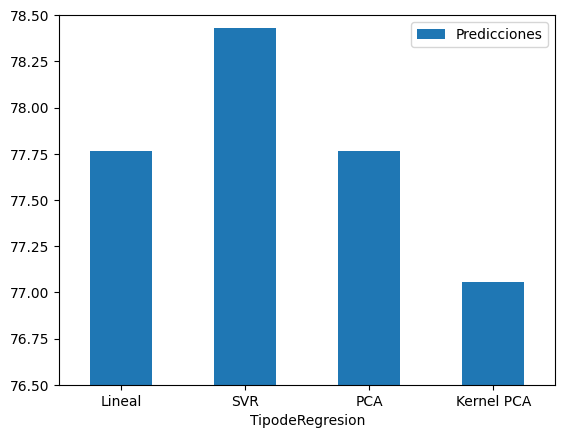

In [55]:
tests = [[sqrmean1,'Lineal'],[sqrmean2,'SVR'], [mse_lr_pca,'PCA'],[mse_lr_kpca,'Kernel PCA']]
df = pd.DataFrame(tests, columns=['Predicciones', 'TipodeRegresion']) #definimos un nuevo dataframe con las 3 pruebas y sus resultados
plt.figure(figsize=(30,6)) #Realizamos un plot para mostrar su distribución
df.plot.bar(x='TipodeRegresion', y='Predicciones', rot=0) #colocamos los nombres de los ejes
plt.ylim(76.5, 78.5) #definimos los limites para observar mejor los resultados
plt.show() #lo mostramos